# The data

The dataset contains images with 29 different signs in American Sign Language. These are the 26 letters (A through Z) plus the signs for *space*, *delete* and *nothing*. Our model will view these images and learn to classify what sign is made in each image.

Sample images below


Using TensorFlow backend.


Samples images for letter D


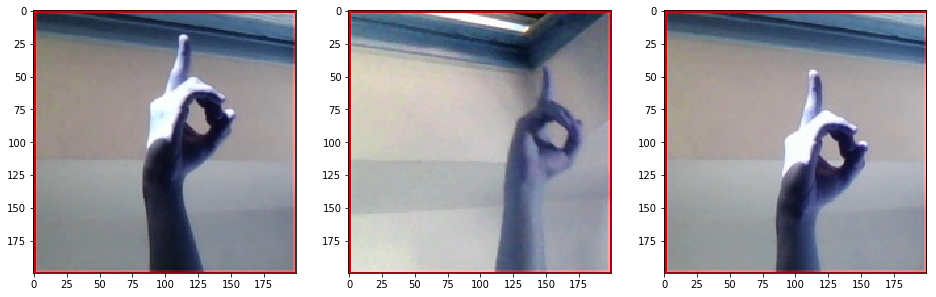

In [1]:
# Imports for Deep Learning
from keras.layers import Conv2D, Dense, Dropout, Flatten,MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

# ensure consistency across runs
import numpy as np
np.random.seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

# Imports to view data
import cv2
from glob import glob
from matplotlib import pyplot as plt
from numpy import floor
import random

def plot_three_samples(letter):
    print("Samples images for letter " + letter)
    base_path = '../input/asl_alphabet_train/asl_alphabet_train/'
    img_path = base_path + letter + '/**'
    path_contents = glob(img_path)
    
    plt.figure(figsize=(16,16))
    imgs = random.sample(path_contents, 3)
    plt.subplot(131)
    plt.imshow(cv2.imread(imgs[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(imgs[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(imgs[2]))
    return

plot_three_samples('D')

# Data Processing Set-Up

In [2]:
data_dir = "asl-alphabet/asl_alphabet_train"
target_size = (64, 64)
target_dims = (64, 64, 1) # add channel for RGB
n_classes = 29
val_frac = 0.1
batch_size = 64

data_augmentor = ImageDataGenerator(samplewise_center=True, 
                                    samplewise_std_normalization=True, 
                                    validation_split=val_frac)

train_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, shuffle=True, 
                                                     subset="training",color_mode='grayscale')
val_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, subset="validation",
                                                  color_mode='grayscale')

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


# Model Specification

In [3]:
my_model = Sequential()
my_model.add(Conv2D(64, kernel_size=3, strides=1, activation='relu', input_shape=target_dims))
my_model.add(MaxPooling2D())
my_model.add(Conv2D(64, kernel_size=3, strides=1, activation='relu'))
my_model.add(MaxPooling2D())
my_model.add(Dropout(0.5))
my_model.add(Conv2D(128, kernel_size=3, strides=1, activation='relu'))
my_model.add(MaxPooling2D())
my_model.add(Conv2D(128, kernel_size=3, strides=1, activation='relu'))
my_model.add(MaxPooling2D())
#my_model.add(Conv2D(256, kernel_size=3, strides=1, activation='relu'))
#my_model.add(MaxPooling2D())
#my_model.add(Conv2D(256, kernel_size=3, strides=1, activation='relu'))
my_model.add(Flatten())
my_model.add(Dropout(0.5))
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(n_classes, activation='softmax'))

my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Model Fitting

In [4]:
my_model.fit_generator(train_generator, epochs=5, validation_data=val_generator,validation_steps=136,steps_per_epoch=1224)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
1224/1224 [==============================] - 713s 583ms/step - loss: 1.2713 - acc: 0.5967 - val_loss: 0.7495 - val_acc: 0.7278
Epoch 2/5
1224/1224 [==============================] - 379s 310ms/step - loss: 0.3855 - acc: 0.8683 - val_loss: 0.4624 - val_acc: 0.8203
Epoch 3/5
1224/1224 [==============================] - 398s 325ms/step - loss: 0.2526 - acc: 0.9140 - val_loss: 0.4597 - val_acc: 0.8391
Epoch 4/5
1224/1224 [==============================] - 398s 325ms/step - loss: 0.2015 - acc: 0.9319 - val_loss: 0.4791 - val_acc: 0.8363
Epoch 5/5
1224/1224 [==============================] - 347s 283ms/step - loss: 0.1667 - acc: 0.9444 - val_loss: 0.5006 - val_acc: 0.8391


In [5]:
my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)         0         
__________

In [6]:
test = "asl_alphabet_test/asl_alphabet_test"

Z = cv2.imread(test+'/S_test.jpg',0)

Z= (Z- np.mean(Z))/np.std(Z)
Z_small = cv2.resize(Z,(64,64))
#Z_small = Z_small/255.0


#Z.shape
Z_small = Z_small.reshape((1,64,64,1))
my_model.predict_classes(Z_small) , train_generator.class_indices['S']

(array([18]), 18)

In [7]:
Z_small.shape

(1, 64, 64, 1)

In [11]:
train_generator.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28}

In [12]:
my_model.save('model_asl_grayscale.h5')